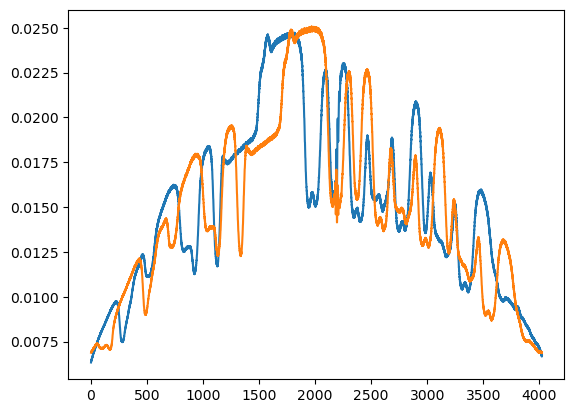

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取两张图片
image1 = cv2.imread("origin_images/2.png", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("origin_images/222.png", cv2.IMREAD_GRAYSCALE)
#转float
image1 = image1.astype(np.float32)
image2 = image2.astype(np.float32)
#计算图片每列平均灰度并归一化
x1 = np.mean(image1, axis=0)
x1 = x1 / np.linalg.norm(x1)
x2 = np.mean(image2, axis=0)
x2 = x2 / np.linalg.norm(x2)
#画图
plt.plot(x1)
plt.plot(x2)
plt.show()

可以看出两张图片列均灰度大体一致，但存在“相位差”,这个相位差就是两个图片的相对位移，只要求出相位差，即可实现大致的匹配。下面求向位差：

原理很简单，假如x1和x2除相位外完全一致，设x1超前相位d，则x1[n]=x2[n+d]，令向量y[n]=x1[n]-x2[n+d]，y的模长为0。

事实上由于各种误差或成像因素，y的模长不可能为0，但很显然当d恰好为相位差时，y的模长取最小值。因此我们可以计算不同d下的y模长，其最小值即为相位差。

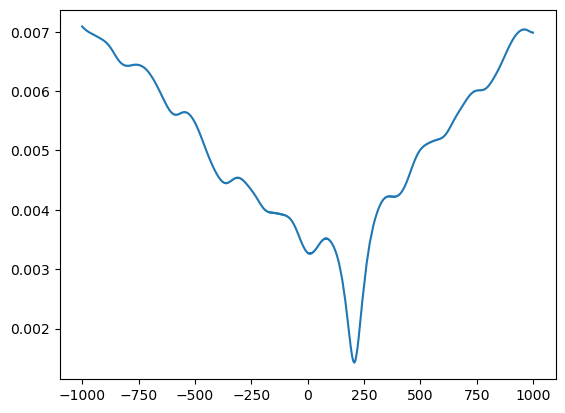

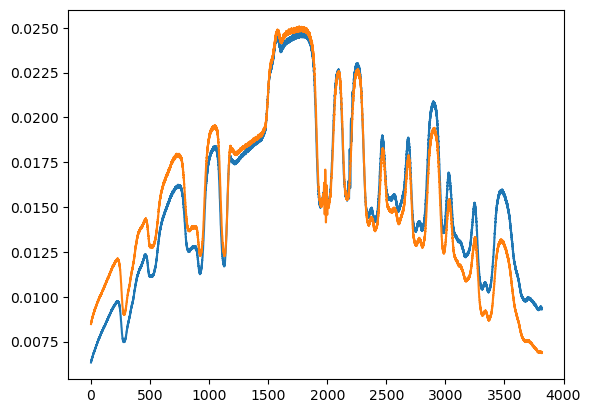

In [4]:
wide = 1000
energy_diff = []
# 分d为负、d=0、d为正三种情况遍历
for d in range(-wide, 0):
    # 计算上面的y
    diff = x1[-d:] - x2[:d]
    # 加上sqrt(len(diff))修正为均方误差，避免d过大
    e = np.linalg.norm(diff) / np.sqrt(len(diff))
    energy_diff.append(e)
diff = x1 - x2
e = np.linalg.norm(diff) / np.sqrt(len(diff))
energy_diff.append(e)
for d in range(1, wide):
    diff = x1[:-d] - x2[d:]
    e = np.linalg.norm(diff) / np.sqrt(len(diff))
    energy_diff.append(e)
# 最小值点对应的d即为相位差
min_index = np.argmin(energy_diff) - wide
# 显示y模长和d的变化关系
plt.plot(np.arange(-wide, wide), energy_diff)
plt.show()
# 显示x1[n]和x2[n+d]
plt.plot(x1[:-min_index])
plt.plot(x2[min_index:])
plt.show()

In [8]:
#图像做差
result = image1[:, :-min_index] - image2[:, min_index:]
min_value = result.min()
max_value = result.max()
#结果归一化
scaled_matrix = 255 * (result - min_value) / (max_value - min_value)
# cv2.imwrite("result.png", result)
cv2.imwrite("2transed.jpg",image1[:, :-min_index])
cv2.imwrite("222transed.jpg",image2[:, min_index:])

True

In [6]:
import cv2
# 读取图像
image = cv2.imread('origin_images/22.png', cv2.IMREAD_GRAYSCALE)
# 获取图像宽度和高度
height, width = image.shape
# 计算左半侧的平均灰度
left_half = image[:, width//3:width // 2]
left_average = left_half.mean()
# 计算右半侧的平均灰度
right_half = image[:, width // 2:(2*width)//3]
right_average = right_half.mean()
print(f"左半侧平均灰度: {left_average}")
print(f"右半侧平均灰度: {right_average}")

左半侧平均灰度: 115.60711796249281
右半侧平均灰度: 93.27676194128173


In [7]:
# 左半侧平均灰度: 84.55774673435016
# 右半侧平均灰度: 76.07072338695102